# Non Linear Regression

### Importing Modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
# from sklearn import datasets

### Load the dataset

In [14]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


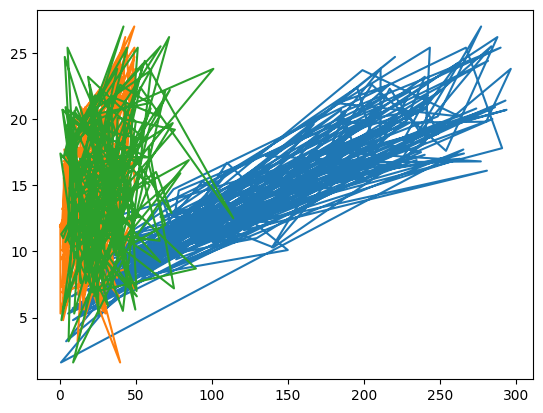

In [16]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

plt.plot(X, Y)

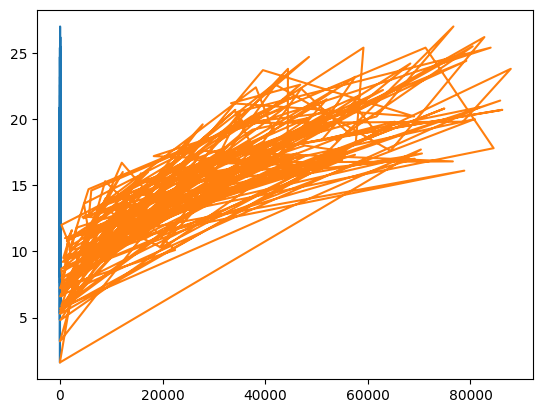

In [28]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

poly_features = polynomial_converter.fit_transform(X)
poly_features.shape
plt.plot(poly_features[:, 2:4], Y)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=100)
print(X_train)

[[2.13400e+02 2.46000e+01 1.31000e+01 ... 6.05160e+02 3.22260e+02
  1.71610e+02]
 [1.51500e+02 4.13000e+01 5.85000e+01 ... 1.70569e+03 2.41605e+03
  3.42225e+03]
 [2.05000e+02 4.51000e+01 1.96000e+01 ... 2.03401e+03 8.83960e+02
  3.84160e+02]
 ...
 [1.39300e+02 1.45000e+01 1.02000e+01 ... 2.10250e+02 1.47900e+02
  1.04040e+02]
 [6.23000e+01 1.26000e+01 1.83000e+01 ... 1.58760e+02 2.30580e+02
  3.34890e+02]
 [8.60000e+00 2.10000e+00 1.00000e+00 ... 4.41000e+00 2.10000e+00
  1.00000e+00]]


In [19]:
LinRegModel = LinearRegression(fit_intercept=True)
LinRegModel.fit(X_train, Y_train)

LinearRegression()

In [20]:
Y_predict = LinRegModel.predict(X_test)

In [21]:
meanAbsError = mean_absolute_error(Y_test, Y_predict)
meanSqError = mean_squared_error(Y_test, Y_predict)
rootMeanSqError = np.sqrt(meanSqError)
print(meanAbsError, meanSqError, rootMeanSqError)

1.0514271023622057 1.887647427164576 1.3739168195944673


In [22]:
train_rmse_error = []
test_rmse_error = []
for d in range(1,10):
    polynomial_convertor = PolynomialFeatures(degree = d ,include_bias = False)
    poly_features = polynomial_convertor.fit_transform(X)
    X_train , X_test,y_train,y_test = train_test_split(poly_features,Y,test_size=0.3,random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_error.append(train_RMSE)
    test_rmse_error.append(test_RMSE)
    
print("MAE",mean_absolute_error(y_train,train_pred))
print("MSE",mean_squared_error(y_train,train_pred))   
print("RMSE",train_RMSE)

MAE 0.06243233026143402
MSE 0.041300936690911734
RMSE 0.20322631889327655


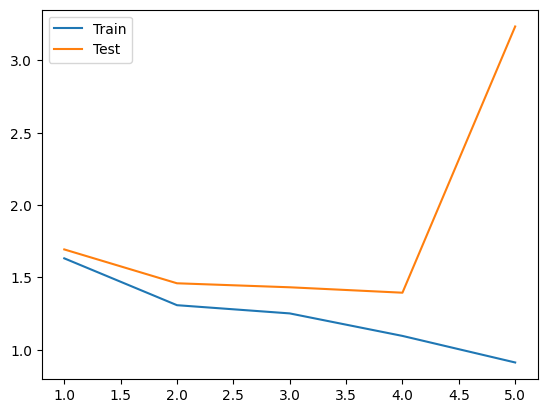

In [23]:
plt.plot(range(1, 6), train_rmse_error[:5], label="Train")
plt.plot(range(1, 6), test_rmse_error[:5], label="Test")
plt.legend()